In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('./dataset/clean_data.csv')
data_vente_ile_de_france = pd.read_csv('./dataset/clean_data_vente_idf.csv')
    
# Définir l'option d'affichage pour afficher toutes les lignes, colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193973 entries, 0 to 1193972
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   No disposition             1193973 non-null  int64  
 1   Date mutation              1193973 non-null  object 
 2   Nature mutation            1193973 non-null  object 
 3   Valeur fonciere            1193973 non-null  float64
 4   No voie                    1168103 non-null  float64
 5   Type de voie               1167773 non-null  object 
 6   Code voie                  1193973 non-null  object 
 7   Voie                       1193973 non-null  object 
 8   Code postal                1193973 non-null  int64  
 9   Commune                    1193973 non-null  object 
 10  Code departement           1193973 non-null  int64  
 11  Code commune               1193973 non-null  int64  
 12  Section                    1193973 non-null  object 
 13  No plan     

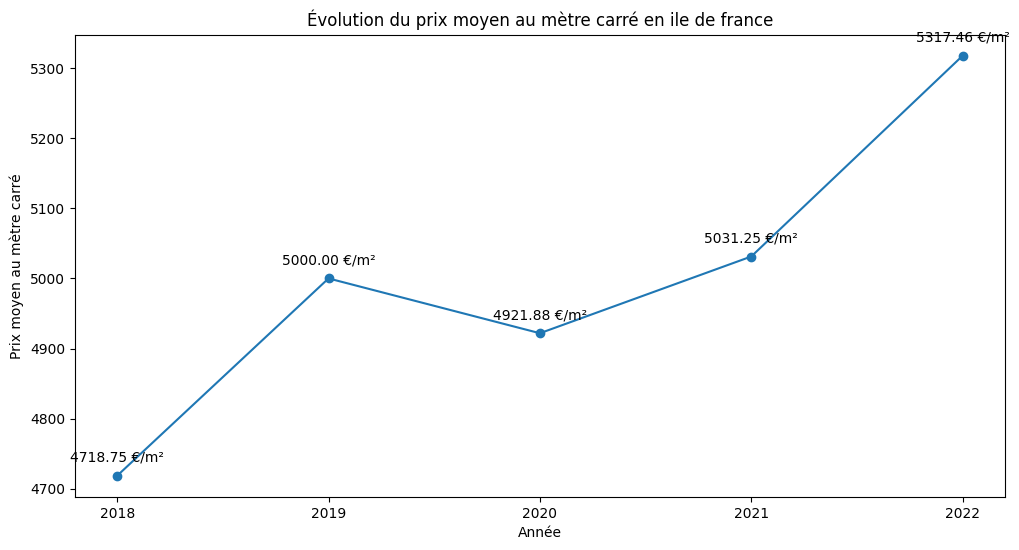

In [2]:
data_std = data[(data['Surface reelle bati'] != 0) & (data['Code type local'].isin([1, 2]))]

# Calculer le prix moyen au mètre carré par année
average_price_per_m2_per_year = data_vente_ile_de_france.groupby('Année mutation')['Valeur fonciere'].median() / data_vente_ile_de_france.groupby('Année mutation')['Surface reelle bati'].median()


# Tracer le graphique du prix moyen au mètre carré
plt.figure(figsize=(12, 6))
average_price_per_m2_per_year.plot(marker='o')

# Ajouter les étiquettes
for x, y in zip(average_price_per_m2_per_year.index, average_price_per_m2_per_year.values):
    label = f"{y:.2f} €/m²"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
# Modifier les étiquettes de l'axe x
plt.xticks([x for x in average_price_per_m2_per_year.index if x % 1 == 0])

plt.xlabel("Année")
plt.ylabel("Prix moyen au mètre carré")
plt.title("Évolution du prix moyen au mètre carré en ile de france")

plt.show()

C:\Users\m.akhmouch\AppData\Local\Temp\ipykernel_12960\1418750031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_std["Date mutation"] = pd.to_datetime(data_std["Date mutation"])
C:\Users\m.akhmouch\AppData\Local\Temp\ipykernel_12960\1418750031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nature_data["Date mutation"] = pd.to_datetime(nature_data["Date mutation"])
C:\Users\m.akhmouch\AppData\Local\Temp\ipykernel_12960\1418750031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

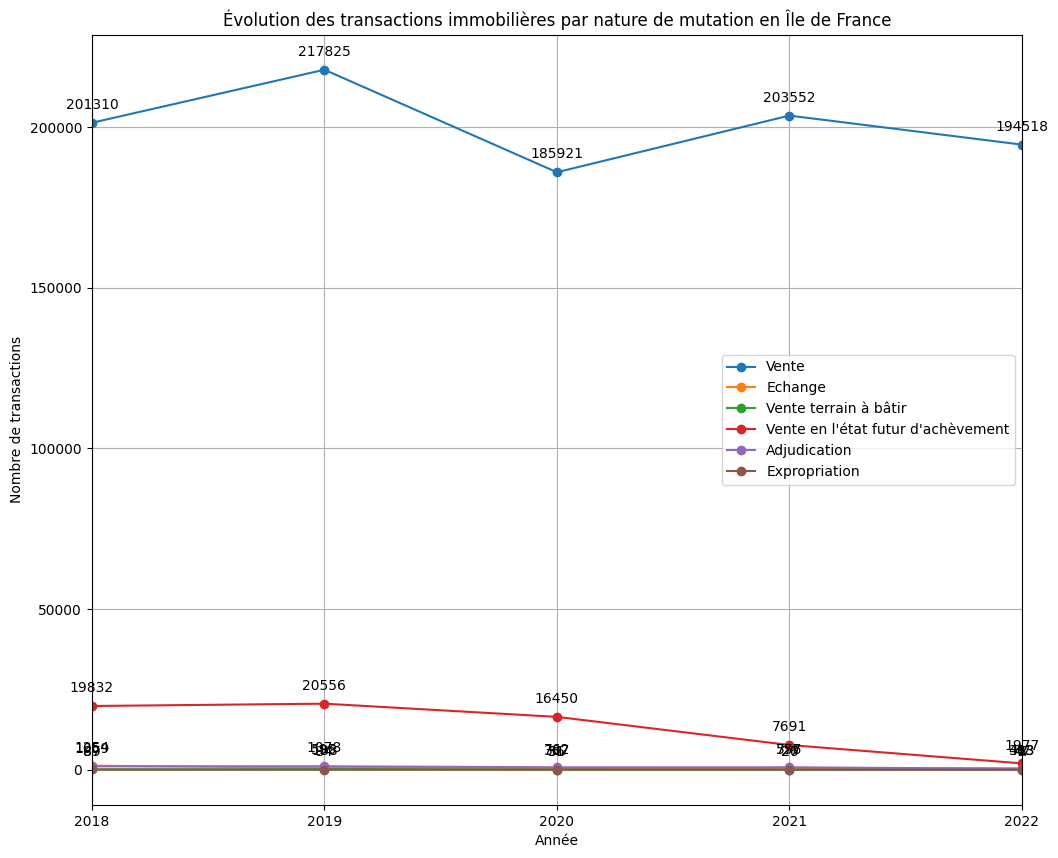

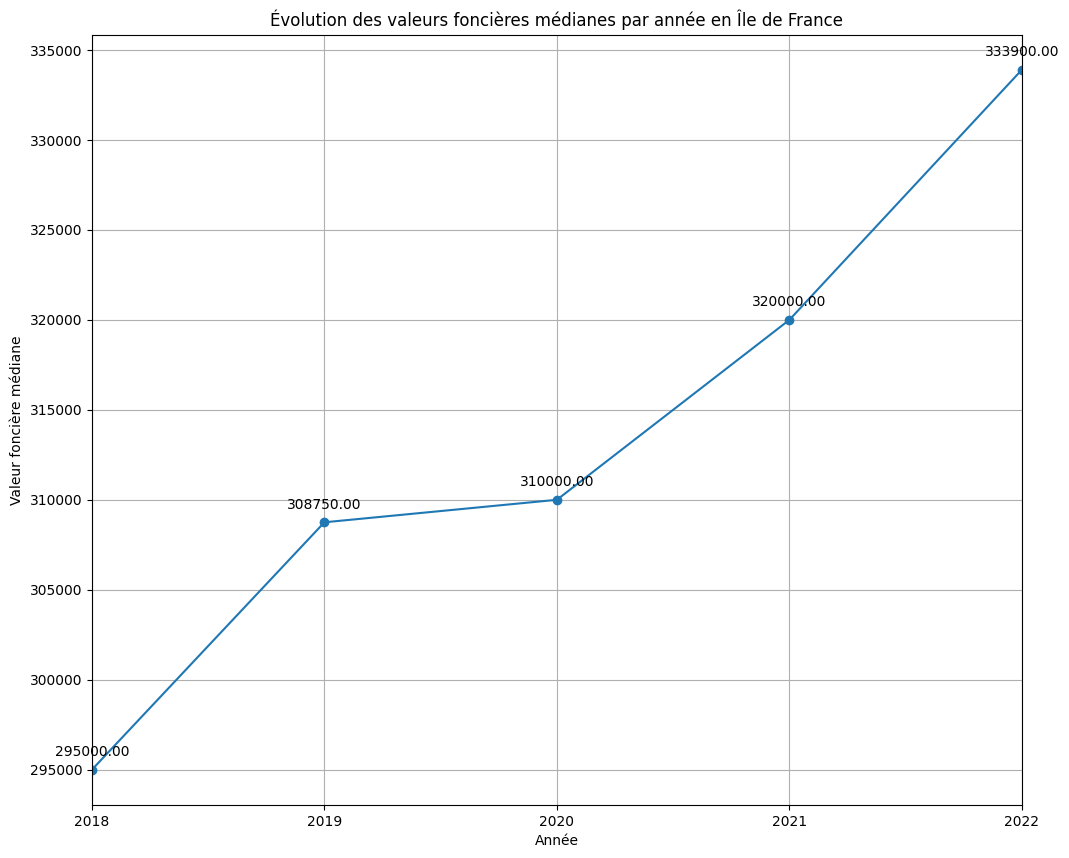

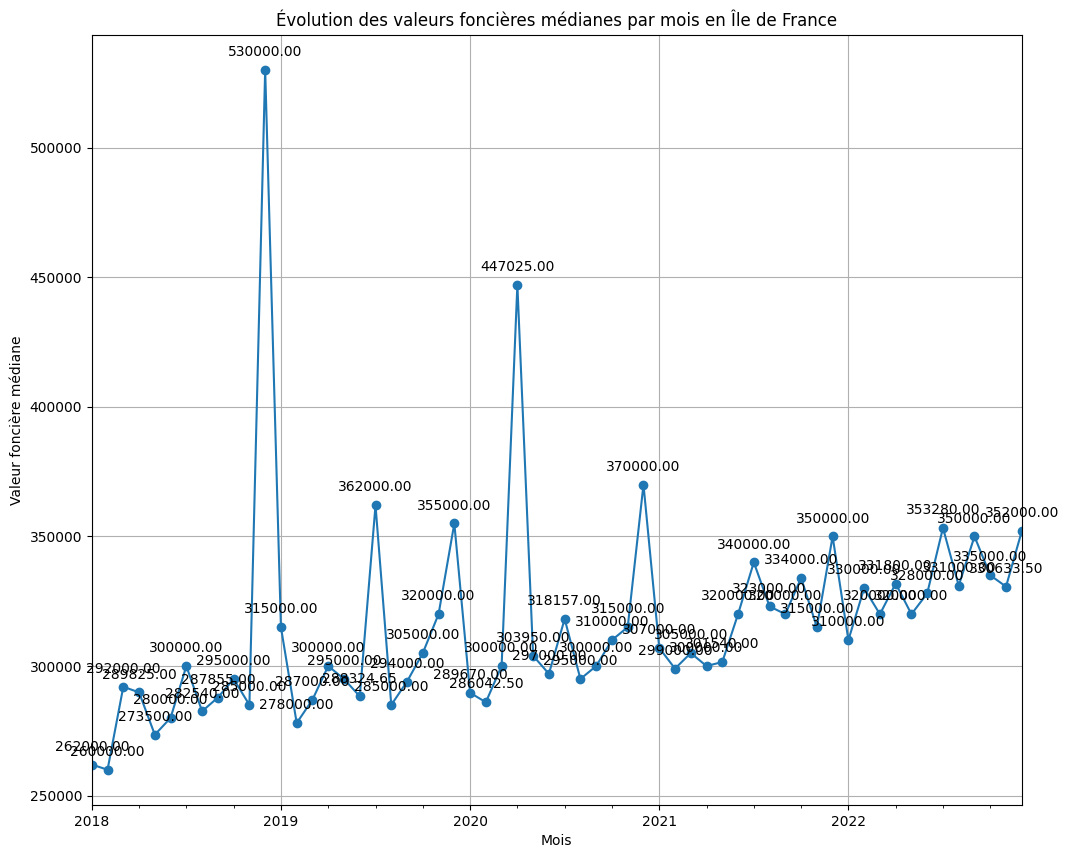

In [3]:
# Graphique temporel - Évolution des transactions immobilières par nature de mutation
plt.figure(figsize=(12, 10))
nature_mutations = ['Vente', 'Echange', 'Vente terrain à bâtir', "Vente en l'état futur d'achèvement", 'Adjudication', 'Expropriation']
data_std["Date mutation"] = pd.to_datetime(data_std["Date mutation"])

for nature in nature_mutations:
    nature_data = data_std[data_std["Nature mutation"] == nature]
    nature_data["Date mutation"] = pd.to_datetime(nature_data["Date mutation"])
    nature_data = nature_data.set_index("Date mutation")
    transaction_counts = nature_data.resample('A')["No disposition"].count()
    transaction_counts.plot(marker='o', label=nature)

    for x, y in zip(transaction_counts.index, transaction_counts.values):
        label = f"{y}"
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Année")
plt.ylabel("Nombre de transactions")
plt.title("Évolution des transactions immobilières par nature de mutation en Île de France")
plt.legend()
plt.grid(True)
plt.show()


# Graphique des valeurs foncières par année
plt.figure(figsize=(12, 10))
data_vente = data_std.set_index("Date mutation")
yearly_median_prices = data_vente.resample('A')["Valeur fonciere"].median()
yearly_median_prices.plot(marker='o')

for x, y in zip(yearly_median_prices.index, yearly_median_prices.values):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Année")
plt.ylabel("Valeur foncière médiane")
plt.title("Évolution des valeurs foncières médianes par année en Île de France")
plt.grid(True)
plt.show()

# Graphique des valeurs foncières par mois
plt.figure(figsize=(12, 10))
data_vente_ile_de_france = data_std.set_index("Date mutation")
monthly_median_prices = data_vente_ile_de_france.resample('M')["Valeur fonciere"].median()
monthly_median_prices.plot(marker='o')

for x, y in zip(monthly_median_prices.index, monthly_median_prices.values):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Mois")
plt.ylabel("Valeur foncière médiane")
plt.title("Évolution des valeurs foncières médianes par mois en Île de France")
plt.grid(True)
plt.show()


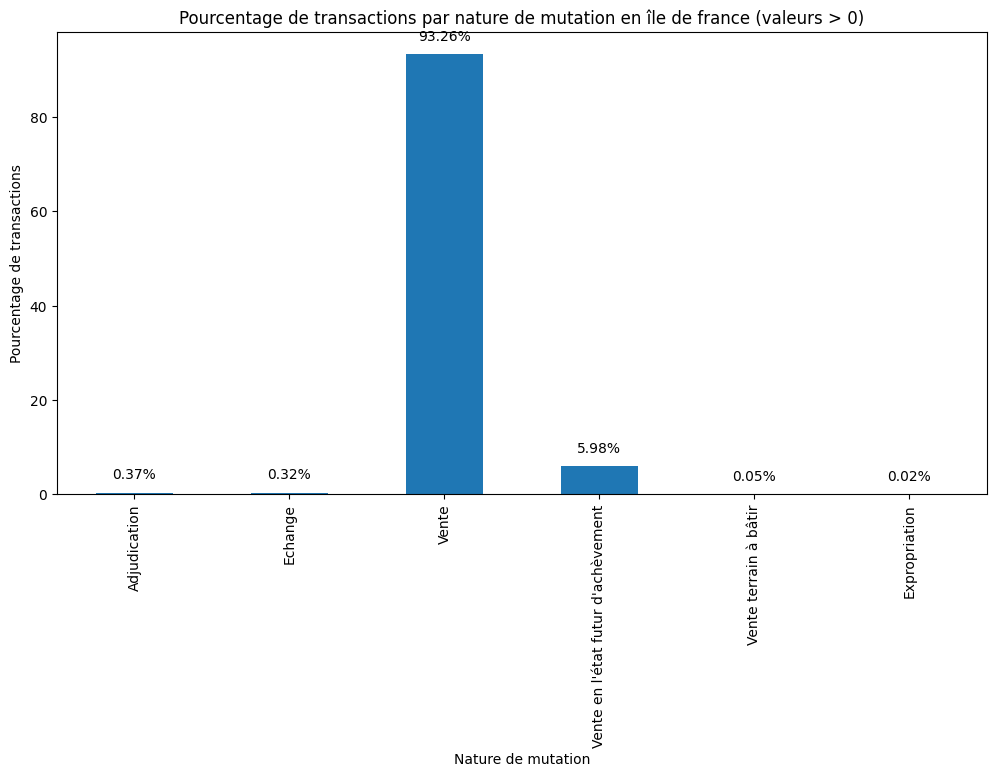

In [4]:
# Calculer le pourcentage pour chaque catégorie
transaction_counts = data.groupby('Nature mutation')['No disposition'].count()
total_transactions = transaction_counts.sum()
transaction_percentages = transaction_counts / total_transactions * 100

# Filtrer les catégories avec des valeurs supérieures à 0
filtered_transaction_percentages = transaction_percentages[transaction_percentages > 0]

# Tracer le diagramme à barres avec les valeurs filtrées
plt.figure(figsize=(12, 6))
bar_plot = filtered_transaction_percentages.plot(kind='bar')

# Ajouter les étiquettes aux barres
for i, value in enumerate(filtered_transaction_percentages):
    plt.annotate(f"{value:.2f}%", (i, value), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Nature de mutation")
plt.ylabel("Pourcentage de transactions")
plt.title("Pourcentage de transactions par nature de mutation en île de france (valeurs > 0)")

plt.show()


In [ ]:
import geopandas as gpd
import folium
import ipywidgets as widgets
from IPython.display import clear_output, HTML

# Calculer le prix médian au mètre carré par année
mediane_price_per_m2_per_department = data_vente_ile_de_france.groupby('Code commune')['Valeur fonciere'].median() / data_vente_ile_de_france.groupby('Code commune')['Surface reelle bati'].median()

# Conversion de la série en DataFrame
df_mediane_price_per_m2_per_department = pd.DataFrame({'Code commune': mediane_price_per_m2_per_department.index.astype(int), 'Prix median': mediane_price_per_m2_per_department.values})

df_mediane_price_per_m2_per_department['Prix median'] = df_mediane_price_per_m2_per_department['Prix median'].astype(int)

# Charger les données géographiques des départements
departements = gpd.read_file('./dataset/communes-departement-region.csv')
# Supprimer les lignes avec une valeur vide dans la colonne 'code_commune'
departements = departements.drop(departements[departements['code_commune'] == ''].index)
departements = departements.dropna(subset=['code_commune'])
departements = departements[departements["code_region"] == "11"]
departements['code_commune'] = departements['code_commune'].astype(int)

# Jointure des données des départements avec les prix moyens
departements = departements.merge(df_mediane_price_per_m2_per_department, left_on='code_commune', right_on='Code commune', how='right')
# Supprimer les colonnes vides
empty_cols = departements.columns[departements.isnull().all()]
departements.drop(empty_cols, axis=1, inplace=True)

departements = departements.drop(departements[departements['latitude'] == ''].index)
departements = departements.drop(departements[departements['longitude'] == ''].index)

# Créer une carte vide centrée sur l'Île-de-France
map_center = [48.8566, 2.3522]
m = folium.Map(location=map_center, zoom_start=10)

# Créer une couche vide pour les marqueurs
marker_layer = folium.FeatureGroup(name='Communes')

# Ajouter la couche de marqueurs à la carte
marker_layer.add_to(m)

# Sauvegarder la représentation HTML de la carte
map_html = m._repr_html_()

# Créer une fonction pour supprimer la carte
def remove_map():
    # Effacer la carte en affichant un HTML vide
    clear_output(wait=True)
    display(input_box)
    display(button)
    display(remove_button)

# Créer une fonction pour afficher les informations de la commune lors de la recherche
def show_commune_info(code):
    global m  # Utilisation de la variable globale marker_layer

    row = departements.loc[departements['code_commune_INSEE'] == code]
    
    if not row.empty:
        commune = row['nom_commune_postal'].iloc[0]
        prix_median = row['Prix median'].iloc[0]
        latitude = float(row['latitude'].iloc[0])
        longitude = float(row['longitude'].iloc[0])
        m = folium.Map(location=[latitude, longitude], zoom_start=10)
        
        # Créer une info-bulle avec le nom de la commune et le prix médian
        popup_text = f"Commune : {commune}<br>Prix médian m2 : {prix_median}"

        # Ajouter un nouveau marqueur à la couche
        folium.Marker(
            location=[latitude, longitude],
            popup=folium.Popup(popup_text, max_width=250),
            icon=folium.Icon(color='green', icon='tint', prefix='fa')
        ).add_to(m)
        # Sauvegarder la représentation HTML de la carte
        map_html = m._repr_html_()
        # Afficher la carte initiale
        display(HTML(map_html))

# Créer une fonction de recherche
def search_commune(b):
    query = input_box.value.strip()
    if query.isdigit():
        row = departements.loc[departements['code_postal'] == query]
        if not row.empty:
            code = row['code_commune_INSEE'].iloc[0]
            show_commune_info(code)
    else:
        row = departements.loc[departements['nom_commune_postal'].str.contains(query.upper(), case=False)]
        if not row.empty:
            code = row['code_commune_INSEE'].iloc[0]
            show_commune_info(code)

# Créer un champ de recherche
input_box = widgets.Text(description='Recherche:', value='')
display(input_box)

# Créer un bouton de recherche
button = widgets.Button(description='Chercher')
display(button)

# Lier la fonction de recherche au clic sur le bouton
button.on_click(search_commune)

# Créer un bouton pour supprimer la carte
remove_button = widgets.Button(description='Supprimer la carte')
display(remove_button)

# Lier la fonction de suppression au clic sur le bouton
remove_button.on_click(lambda _: remove_map())



Text(value='91300', description='Recherche:')

Button(description='Chercher', style=ButtonStyle())

Button(description='Supprimer la carte', style=ButtonStyle())

In [64]:

from sklearn.preprocessing import LabelEncoder

def encodage_categorical_for_models(df):
    """
    Encodage des colonnes catégorielles d'un DataFrame pour le machine learning.
    
    Arguments:
    - df : DataFrame - Le DataFrame contenant les données à encoder.
    
    Retourne:
    - DataFrame - Le DataFrame avec les colonnes catégorielles encodées.
    """
    df_encodage = df.copy()  # Copie du DataFrame original
    label_encoder = LabelEncoder()  # Créer une instance du LabelEncoder
    
    # Parcourir toutes les colonnes du DataFrame
    for colonne in df_encodage.columns:
        if df_encodage[colonne].dtype == 'object':  # Vérifier si la colonne est de type objet
            df_encodage[colonne] = label_encoder.fit_transform(df_encodage[colonne].astype(str))  # Encodage de la colonne
        elif df_encodage[colonne].dtype == 'float64' : # Vérifier si la colonne est de type float
            df_encodage[colonne] = df_encodage[colonne].fillna(0).astype(int)  # Remplacer les valeurs nulles par 0 et convertir en int
        elif df_encodage[colonne].dtype == 'int64' : # Vérifier si la colonne est de type int
            df_encodage[colonne] = df_encodage[colonne].fillna(0)
        else : 
            df_encodage[colonne] = label_encoder.fit_transform(df_encodage[colonne].astype(str))
    return df_encodage

#colonnes non-necessaire ou en doublon 
columns_to_delete = ['Type de voie', 'Code voie', 'Voie', 'Type local']

#on supprime les doublons
data.drop_duplicates(inplace=True)
data['Prix au m2'] = data['Valeur fonciere'] / data['Surface reelle bati']
# Supprimer les colonnes du DataFrame
data_copy_encoded = data.drop(columns=columns_to_delete)


#on recheck les caractéristiques de notre jeu de données
print(data_copy_encoded.info())
print(data_copy_encoded.isnull().sum())
print(data_copy_encoded.head())
print(data_copy_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085785 entries, 2813381 to 3335291
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   No disposition             1085785 non-null  int64         
 1   Date mutation              1085785 non-null  datetime64[ns]
 2   Nature mutation            1085785 non-null  category      
 3   Valeur fonciere            1085785 non-null  float64       
 4   No voie                    1062990 non-null  object        
 5   Code postal                1085785 non-null  int32         
 6   Commune                    1085785 non-null  object        
 7   Code departement           1085785 non-null  int32         
 8   Code commune               1085785 non-null  int64         
 9   Section                    1085785 non-null  object        
 10  No plan                    1085785 non-null  int64         
 11  Nombre de lots             1085

In [65]:
# Nettoyage et encodage des données catégorielles
data_copy_encoded = encodage_categorical_for_models(data_copy_encoded)
colonnes_gardees = ['Prix au m2','Date mutation', 'Code postal', 'Code commune', 'Valeur fonciere', 'Année mutation', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']

data_copy_encoded = data_copy_encoded.loc[:, colonnes_gardees]
print(data_copy_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085785 entries, 2813381 to 3335291
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Prix au m2                 1085785 non-null  int32
 1   Date mutation              1085785 non-null  int32
 2   Code postal                1085785 non-null  int32
 3   Code commune               1085785 non-null  int64
 4   Valeur fonciere            1085785 non-null  int32
 5   Année mutation             1085785 non-null  int64
 6   Surface reelle bati        1085785 non-null  int32
 7   Nombre pieces principales  1085785 non-null  int32
 8   Surface terrain            1085785 non-null  int32
dtypes: int32(7), int64(2)
memory usage: 53.8 MB
None


In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Diviser les données en ensembles d'entraînement et de test
y = data_copy_encoded['Prix au m2']
X = data_copy_encoded.drop(columns=['Prix au m2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Appliquer la mise à l'échelle MinMaxScaler sur les données d'entraînement
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle de régression linéaire
regression_model = LinearRegression()

# Obtention des scores de validation croisée sur les données d'entraînement
scores = cross_val_score(regression_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores en valeurs positives et calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse_scores = np.sqrt(-scores)

# Entraîner le modèle sur les données d'entraînement
regression_model.fit(X_train_scaled, y_train)

# Calculer le coefficient de détermination (R²) sur les données de test
r2_score = regression_model.score(X_test_scaled, y_test)


# Affichage des scores
""" print("Scores de validation croisée (RMSE) : ", rmse_scores)
print("RMSE moyen : ", rmse_scores.mean())
print("Coefficient de détermination (R²) :", r2_score) """

' print("Scores de validation croisée (RMSE) : ", rmse_scores)\nprint("RMSE moyen : ", rmse_scores.mean())\nprint("Coefficient de détermination (R²) :", r2_score) '

In [28]:
""" from sklearn.linear_model import LassoCV

# Création d'un modèle de régression linéaire avec régularisation L1 (Lasso)
lasso_model = LassoCV(cv=5)

# Entraînement du modèle sur les données
lasso_model.fit(X, y)

# Obtention des caractéristiques les plus importantes
important_features = X.columns[lasso_model.coef_ != 0]

# Affichage des caractéristiques sélectionnées
print("Caractéristiques sélectionnées :", important_features) """

Caractéristiques sélectionnées : Index(['Code postal', 'Code commune', 'Surface reelle bati',
       'Nombre pieces principales', 'Surface terrain'],
      dtype='object')
